<a href="https://colab.research.google.com/github/rgolino/Data_Analytic_Airbnb/blob/main/Analisando_os_Dados_do_Airbnb_(Porto_Portugal).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade do Porto, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [2]:
from ast import increment_lineno
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/rgolino/Data_Analytic_Airbnb/main/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número do id do anfitrião da propriedade
*   host_name - Nome do anfitrião
*   neighbourhood_group - esta coluna não contém nenhum valor válido
*   neighbourhood - nome do bairro
*   latitude - coordenada da latitude da propriedade
*   longitude - coordenada da longitude da propriedade
*   room_type - informa o tipo de quarto que é oferecido
*   price - preço para alugar o imóvel
*   minimum_nights - quantidade mínima de noites para reservar
*   number_of_reviews - número de avaliações que a propriedade possui
*   last_review - data do último review
*   reviews_per_month - quantidade de reviews por mês
*   calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
*   availability_365 - número de dias de disponibilidade dentro de 365 dias
*   number_of_reviews_ltm - número de avaliações
*   licence - licença



Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,14667447,Oporto - Paranhos,76561575,Nelson,PORTO,Paranhos,41.16886,-8.60254,Entire home/apt,NaN,2,0,NaN,NaN,1,0,0,NaN
1,17136811,"GAIA (OPORTO , PORTUGAL) - CENTER",109834431,Joana,VILA NOVA DE GAIA,Mafamude e Vilar do Paraíso,41.11466,-8.60563,Private room,NaN,1,2,2017-04-21,0.02,1,0,0,NaN
2,17730260,Home sweet little home,12605401,Maria,PORTO,Paranhos,41.16795,-8.62140,Entire home/apt,NaN,3,92,2020-11-06,1.11,1,0,0,41045/AL
3,21027292,BedNShower EuroPorto,111401508,Adriano,PORTO,Bonfim,41.14755,-8.59364,Private room,NaN,1,0,NaN,NaN,2,0,0,NaN
4,23975787,Pretty Porto Apartment by SOULSHARING.PORTO,180330708,Jurjen,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.15372,-8.60886,Entire home/apt,245.0,2,52,2024-02-25,0.72,1,243,12,66366/AL


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t{}".format(df.shape[0]))
print("Variáveis:\t{}\n".format(df.shape[1]))


# verificar as 5 primeiras entradas do dataset
display (df.dtypes)


Entradas:	13657
Variáveis:	18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

price                             0.126309
last_review                       0.125064
reviews_per_month                 0.125064
license                           0.052354
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
name                              0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
host_name                         0.000000
host_id                           0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

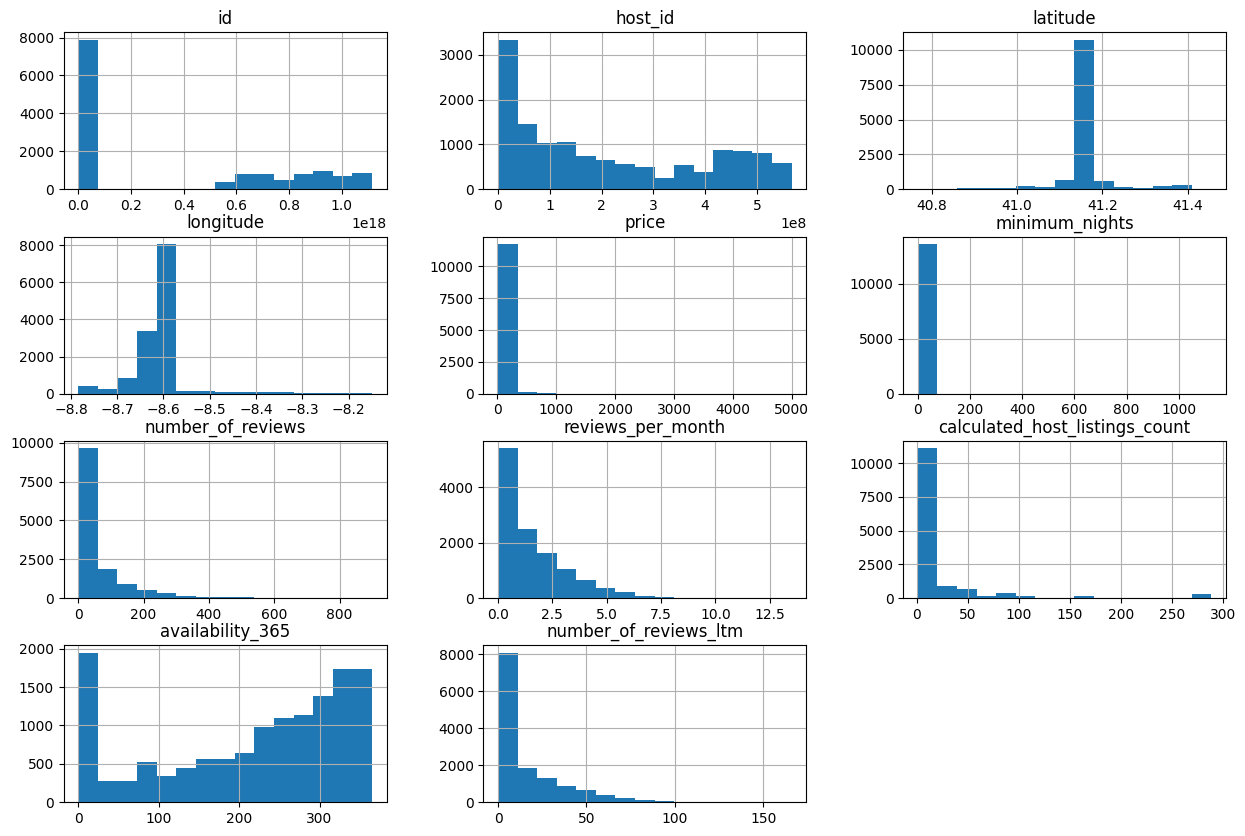

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

####Q.3.1 - Verificando os Outliers e realizando a limpeza.



Iremos plotar um resumo estatístico das variáres para verificarmos qualquer incidência de outliers.

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,11932.000000,13657.000000,13657.000000,11949.000000,13657.000000,13657.000000
mean,91.796933,3.840082,57.709233,1.579571,19.912646,214.623856
std,103.214948,30.652457,90.066121,1.560406,47.144901,120.065156
min,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,53.000000,1.000000,3.000000,0.360000,2.000000,124.000000
50%,72.000000,2.000000,20.000000,1.060000,5.000000,250.000000
75%,100.000000,2.000000,73.000000,2.360000,14.000000,317.000000
max,5000.000000,1125.000000,899.000000,13.500000,289.000000,365.000000


#####Podemos verificar que há incidências de outliers nas variáveis `price` e `minimum_nights`.

Perceba que as variáveis:
    

*   `price` possui um valor máximo de 5.000 porém 75% do seu valor foram igual ou inferior a 100.
*   `minimum_nights` está superior a 365 dias no ano.


Diante dessa deteção faremos um `boxplot` para cada uma das variáveis para termos uma confirmação do outilier.

### Boxplot para price

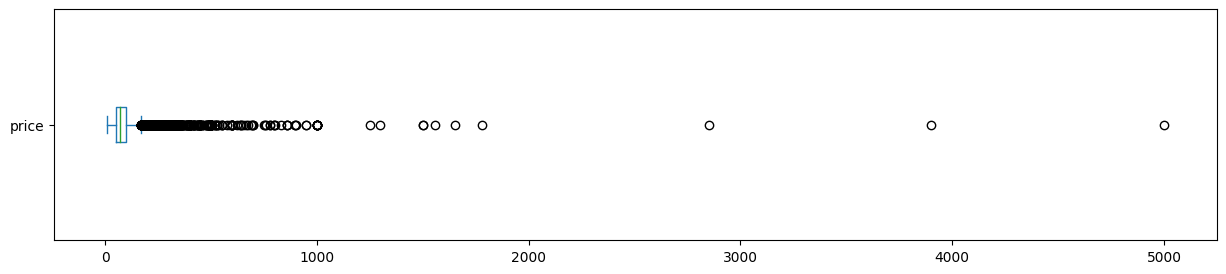


price: valores acima de 500
67 entradas
0.4906%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 500 para price
print("\nprice: valores acima de 500")
print("{} entradas".format(len(df[df.price > 500])))
print("{:.4f}%".format((len(df[df.price > 500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

### Boxplot para minimum_nights

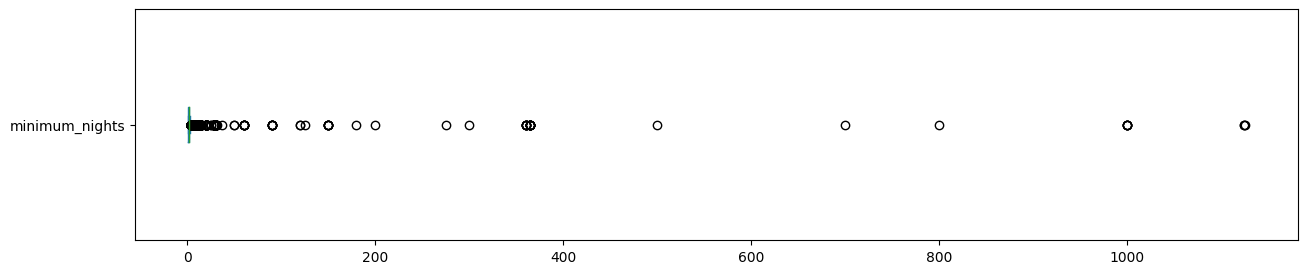

minimum_nights: valores acima de 14:
294 entradas
2.1527%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 14 dias para minimum_nights
print("minimum_nights: valores acima de 14:")
print("{} entradas".format(len(df[df.minimum_nights > 14])))
print("{:.4f}%".format((len(df[df.minimum_nights > 14]) / df.shape[0])*100))

#### Novo plot do DataFrame após limpeza dos outiliers

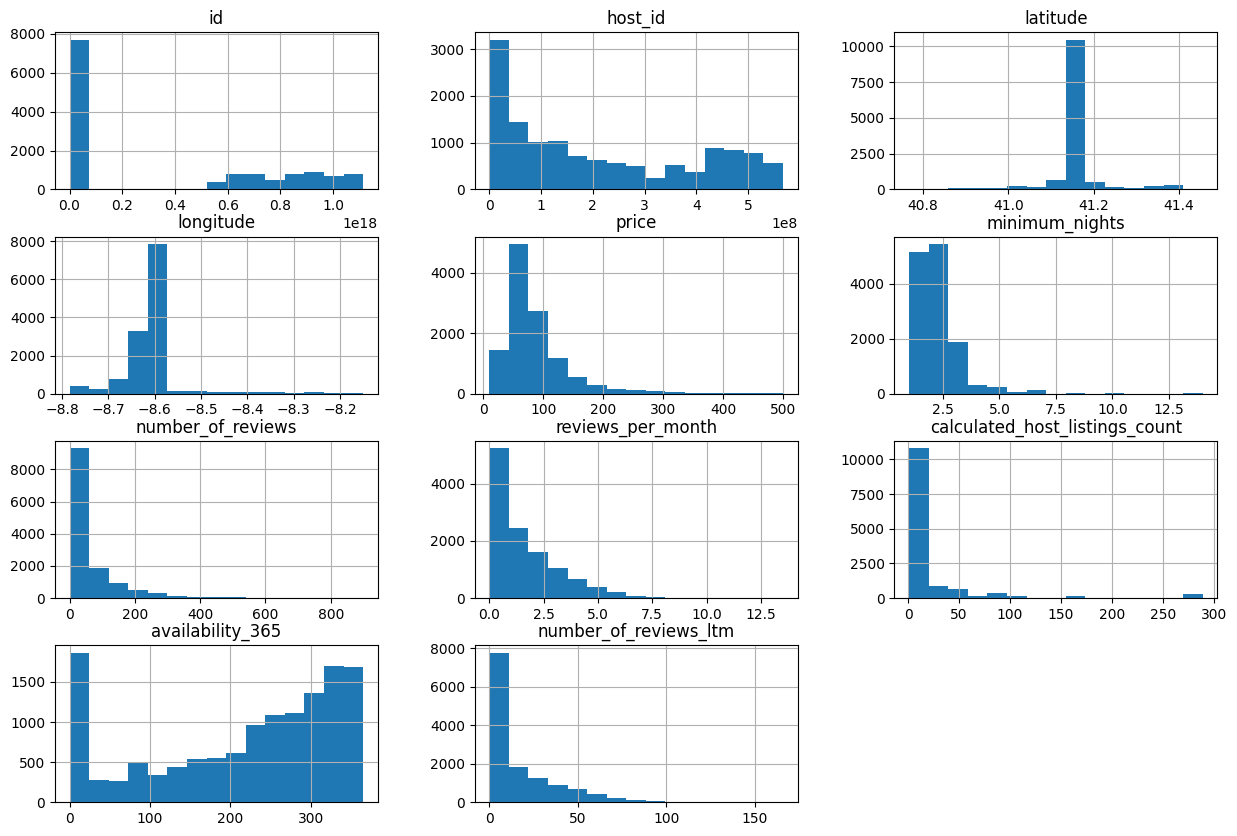

In [ ]:
# Fazer limpeza em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 14].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price`
df['price'].mean()


91.79693261816963

####Perceba que a média de preço é de 91,79.

### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.034235,-0.067465,-0.102224,-0.006529,0.037061
minimum_nights,0.034235,1.000000,-0.011440,-0.149084,-0.184341,-0.166524
number_of_reviews,-0.067465,-0.011440,1.000000,0.623671,-0.034118,-0.053649
reviews_per_month,-0.102224,-0.149084,0.623671,1.000000,0.014277,0.048487
calculated_host_listings_count,-0.006529,-0.184341,-0.034118,0.014277,1.000000,0.197222
availability_365,0.037061,-0.166524,-0.053649,0.048487,0.197222,1.000000


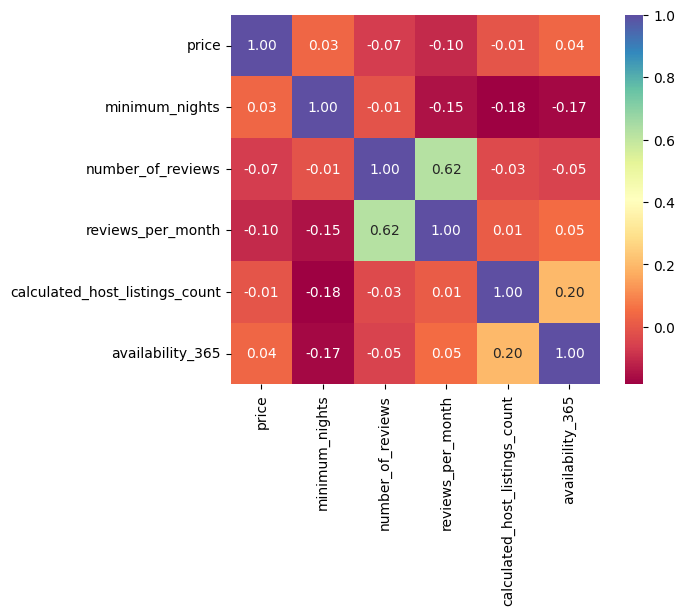

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='Spectral', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

room_type
Entire home/apt    10688
Private room        2291
Shared room          213
Hotel room           105
Name: count, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

room_type
Entire home/apt    0.803790
Private room       0.172295
Shared room        0.016019
Hotel room         0.007897
Name: count, dtype: float64

##### Como mostra a análise, os imómeis mais locado são Casas e ou apartamentos representando 80%, seguido dos quartos privados com 17%.

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Fermedo                   489.142857
Serzedo e Perosinho       466.000000
Água Longa                390.000000
Cristelo                  366.000000
Paramos                   360.000000
Balazar                   288.000000
São Pedro de Castelões    243.625000
Muro                      239.250000
Laundos                   239.000000
Paços de Brandão          232.500000
Name: price, dtype: float64

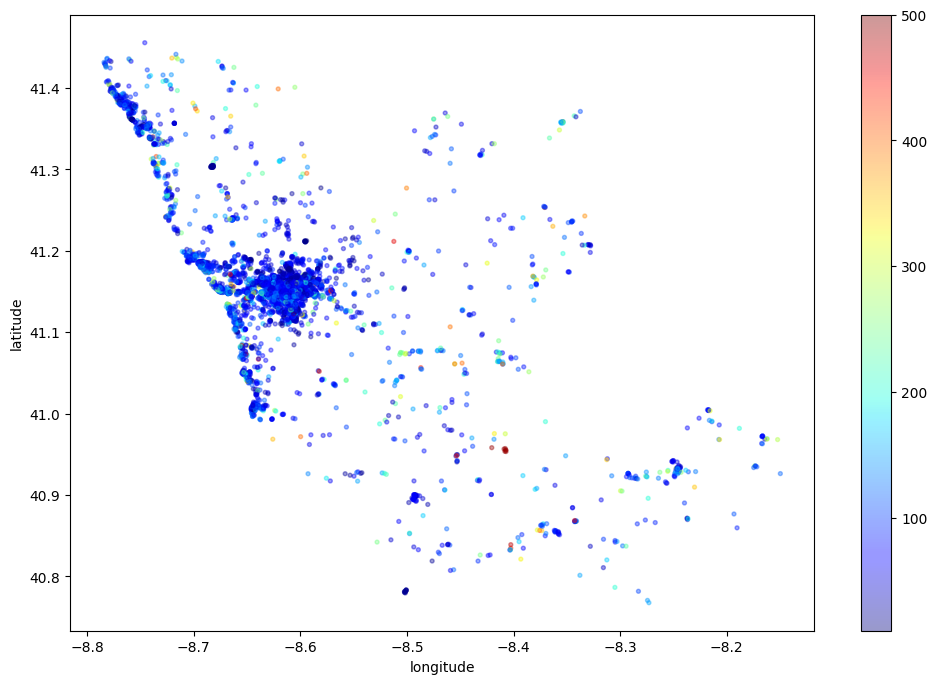

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights`
df['minimum_nights'].mean()

3.840082009226038

####A média de dias locados são de 3,84, ou seja 4 dias de locação.

## Conclusões



#####Nossa análise conclue que em um total de 13657 imóveis disponíveis para locação, 80% dos mais locados são casas inteiras e apartamentos seguido de quarto privativo com 17%.
#####Temos uma média de preço de locação de 91,79 e uma média de mínima de noites de 4 dias.
#####Concluimos também que os bairros **Fermedo** e **Serzedo** são os mais caros para locação pois ultrapassam o valor de 450.